## Data Creation for Convolutional-Autoencoder 

Generamos datos sintéticos de firmas polarimétricas provenientes de superficies rugosas. Las mismas se simulan bajo la aproximación SPM de segundo orden, considerando un _stack_ de dos capas rugosas como suelo a incidir. 

Luego visualizamos y exploramos la distribución de los datos, y sus características. 

### 1 - Generación de datos sin ruido 

Comenzamos importando los módulos que vamos a utilizar en el notebook

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from deep_scattering_models.data.create_data import make_data, save_data, load_data
from deep_scattering_models.visualization.visualize import plot_polarization_signature, plot_histogram
from deep_scattering_models.features.preprocess_data import to_dB

Generamos 20048 firmas polarimétricas de $45x90$. El espacio de parámetros sobre el que se samplea puede consultarse en la documentación de la función ``create_data.init_parameters_grid``.

Luego guardamos los como un solo ndarray en la carpeta data del repositorio.

In [2]:
# Generamos los datos
data = make_data()

# Guardamos los datos en data
file_name = "spm_signatures_no_noise"
save_data(file_name, data)

In [3]:
data = load_data(file_name)

Veamos la pinta de alguna de las firmas polarimétricas generadas

<AxesSubplot:title={'center':'$\\sigma(\\psi,\\chi)$'}, xlabel='Orientation Angle $\\psi$ [°]', ylabel='Ellipticity Angle $\\chi$ [°]'>

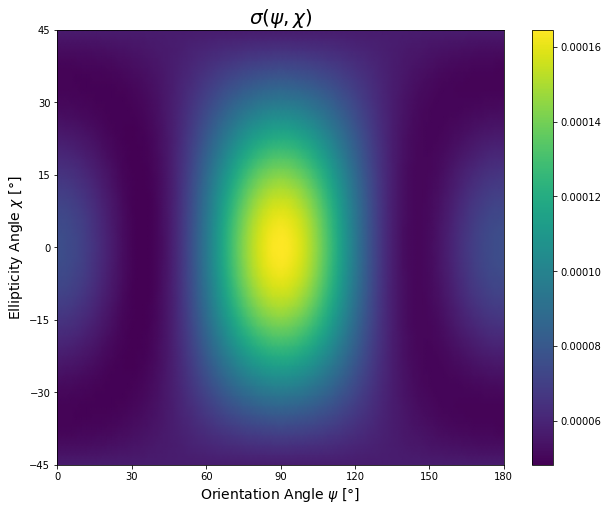

In [4]:
# Elegimos ana firma al azar
rng = np.random.default_rng()
rnd_index = rng.integers(20048)
rnd_signature = data[rnd_index, :, :]

# Ploteamos
plot_polarization_signature(rnd_signature)

### 2 - Exploración de los Datos

Veamos cual es la distribución de los datos en crudo

<AxesSubplot:title={'center':'Polarization Signature values distribution'}, xlabel='$\\sigma(\\psi, \\chi)$', ylabel='Count'>

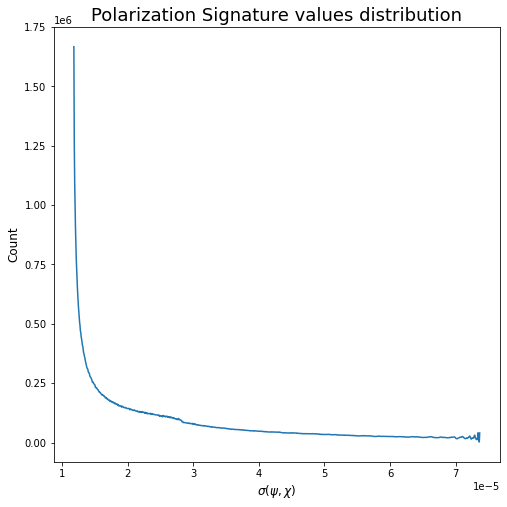

In [5]:
plot_histogram(data)

Pasemos los datos a dB, y volvamos a ver qué forma tiene su histograma

Text(0.5, 0, '$\\sigma(\\psi, \\chi)$ [dB]')

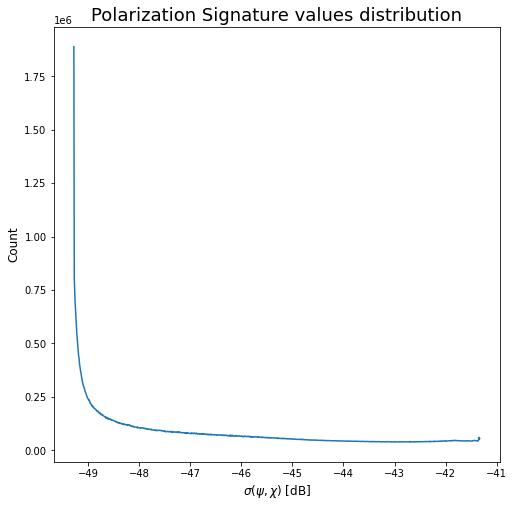

In [6]:
data_dB = to_dB(data)
ax = plot_histogram(data_dB)
ax.set_xlabel(r"$\sigma(\psi, \chi)$ [dB]") 

<AxesSubplot:title={'center':'$\\sigma(\\psi,\\chi)$'}, xlabel='Orientation Angle $\\psi$ [°]', ylabel='Ellipticity Angle $\\chi$ [°]'>

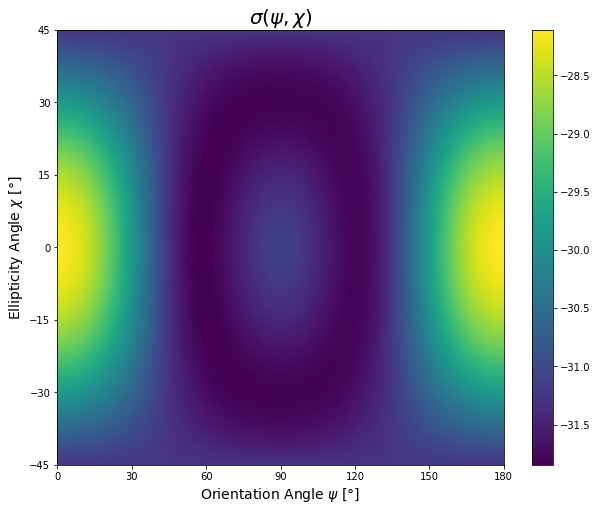

In [7]:
# Elegimos ana firma al azar
rng = np.random.default_rng()
rnd_index = rng.integers(20048)
rnd_signature = data_dB[rnd_index, :, :]

# Ploteamos
plot_polarization_signature(rnd_signature)

### 3 - Datos con ruido

Generamos nuevos datos con ruido de distribución wishart agregado [[1]](https://en.wikipedia.org/wiki/Wishart_distribution), los visualizamos y analizamos sus distribuciones en potencia y en dB.

In [ ]:
# Generamos los datos
noised_data = make_data()

# Guardamos los datos en data
file_name = "spm_signatures.npy"
save_data(file_name, noised_data)